In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')

# Load the data
df = pd.read_csv('../data/train_data.csv')

# --- Sanity Check and Cleanup ---

# 1. Standardize column names
# Strip whitespace, convert to lowercase, replace spaces with underscores
original_columns = df.columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Original Columns:", original_columns)
print("Cleaned Columns:", df.columns)


# 2. Display the first few rows and basic info
print("\nDataFrame Head:")
display(df.head())

print("\nDataFrame Info:")
df.info()

Original Columns: Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Cleaned Columns: Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

DataFrame Head:


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,...,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,...,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2497 non-null   object 
 1   year                             2497 non-null   int64  
 2   status                           2497 non-null   object 
 3   life_expectancy                  2488 non-null   float64
 4   adult_mortality                  2488 non-null   float64
 5   infant_deaths                    2497 non-null   int64  
 6   alcohol                          2333 non-null   float64
 7   percentage_expenditure           2497 non-null   float64
 8   hepatitis_b                      2016 non-null   float64
 9   measles                          2497 non-null   int64  
 10  bmi                              2466 non-null   float64
 11  under_five_deaths                2497 non-null   int64  
 12  pol

In [2]:
# Get a statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Get a count of missing values for each column, sorted
print("\nMissing Values Count:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0]) # Only show columns with missing data


Statistical Summary:


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2497.000000,2488.000000,2488.000000,2497.000000,2333.000000,2497.000000,2016.000000,2497.000000,2466.000000,2497.000000,2481.000000,2306.000000,2481.000000,2497.000000,2132.000000,1.957000e+03,2466.000000,2466.000000,2356.000000,2360.000000
mean,2007.479375,69.143770,164.647508,28.987185,4.577008,731.548870,81.008433,2431.130156,38.092863,40.258710,82.419589,5.936544,82.240226,1.699199,7348.579392,1.313189e+07,4.818613,4.863058,0.625069,11.959534
std,4.616338,9.517112,124.080010,107.624711,4.056307,1987.075471,25.107816,11740.711517,20.098019,147.252113,23.703581,2.493682,23.914151,4.898429,14143.733665,6.507472e+07,4.375821,4.484728,0.213123,3.380734
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.850000,5.347718,77.000000,0.000000,19.100000,0.000000,78.000000,4.252500,78.000000,0.100000,458.064238,1.822860e+05,1.600000,1.525000,0.489750,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.670000,64.398533,92.000000,17.000000,43.000000,4.000000,93.000000,5.750000,93.000000,0.100000,1683.750332,1.354493e+06,3.300000,3.300000,0.676500,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.680000,437.105966,96.000000,383.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5858.119655,7.472819e+06,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



Missing Values Count:
population                         540
hepatitis_b                        481
gdp                                365
total_expenditure                  191
alcohol                            164
income_composition_of_resources    141
schooling                          137
thinness__1_19_years                31
thinness_5_9_years                  31
bmi                                 31
diphtheria                          16
polio                               16
life_expectancy                      9
adult_mortality                      9
dtype: int64


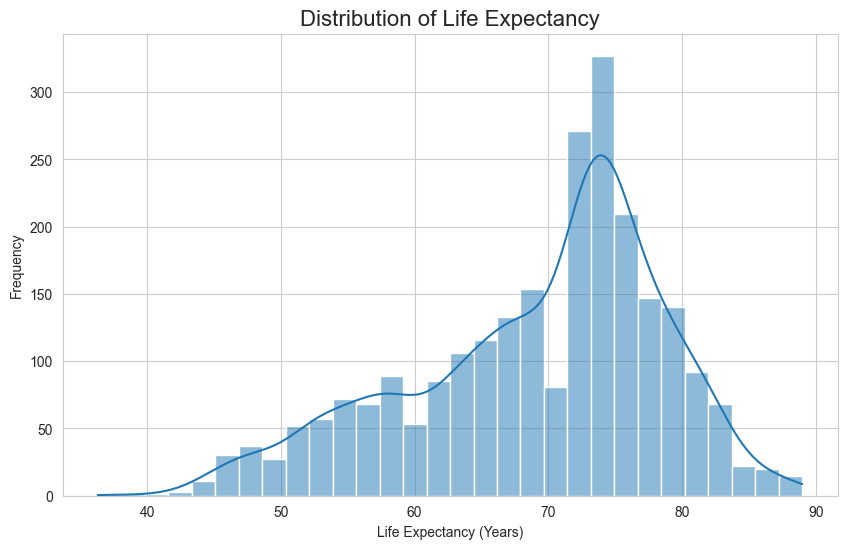

In [3]:
# Analysis of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['life_expectancy'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy', fontsize=16)
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()

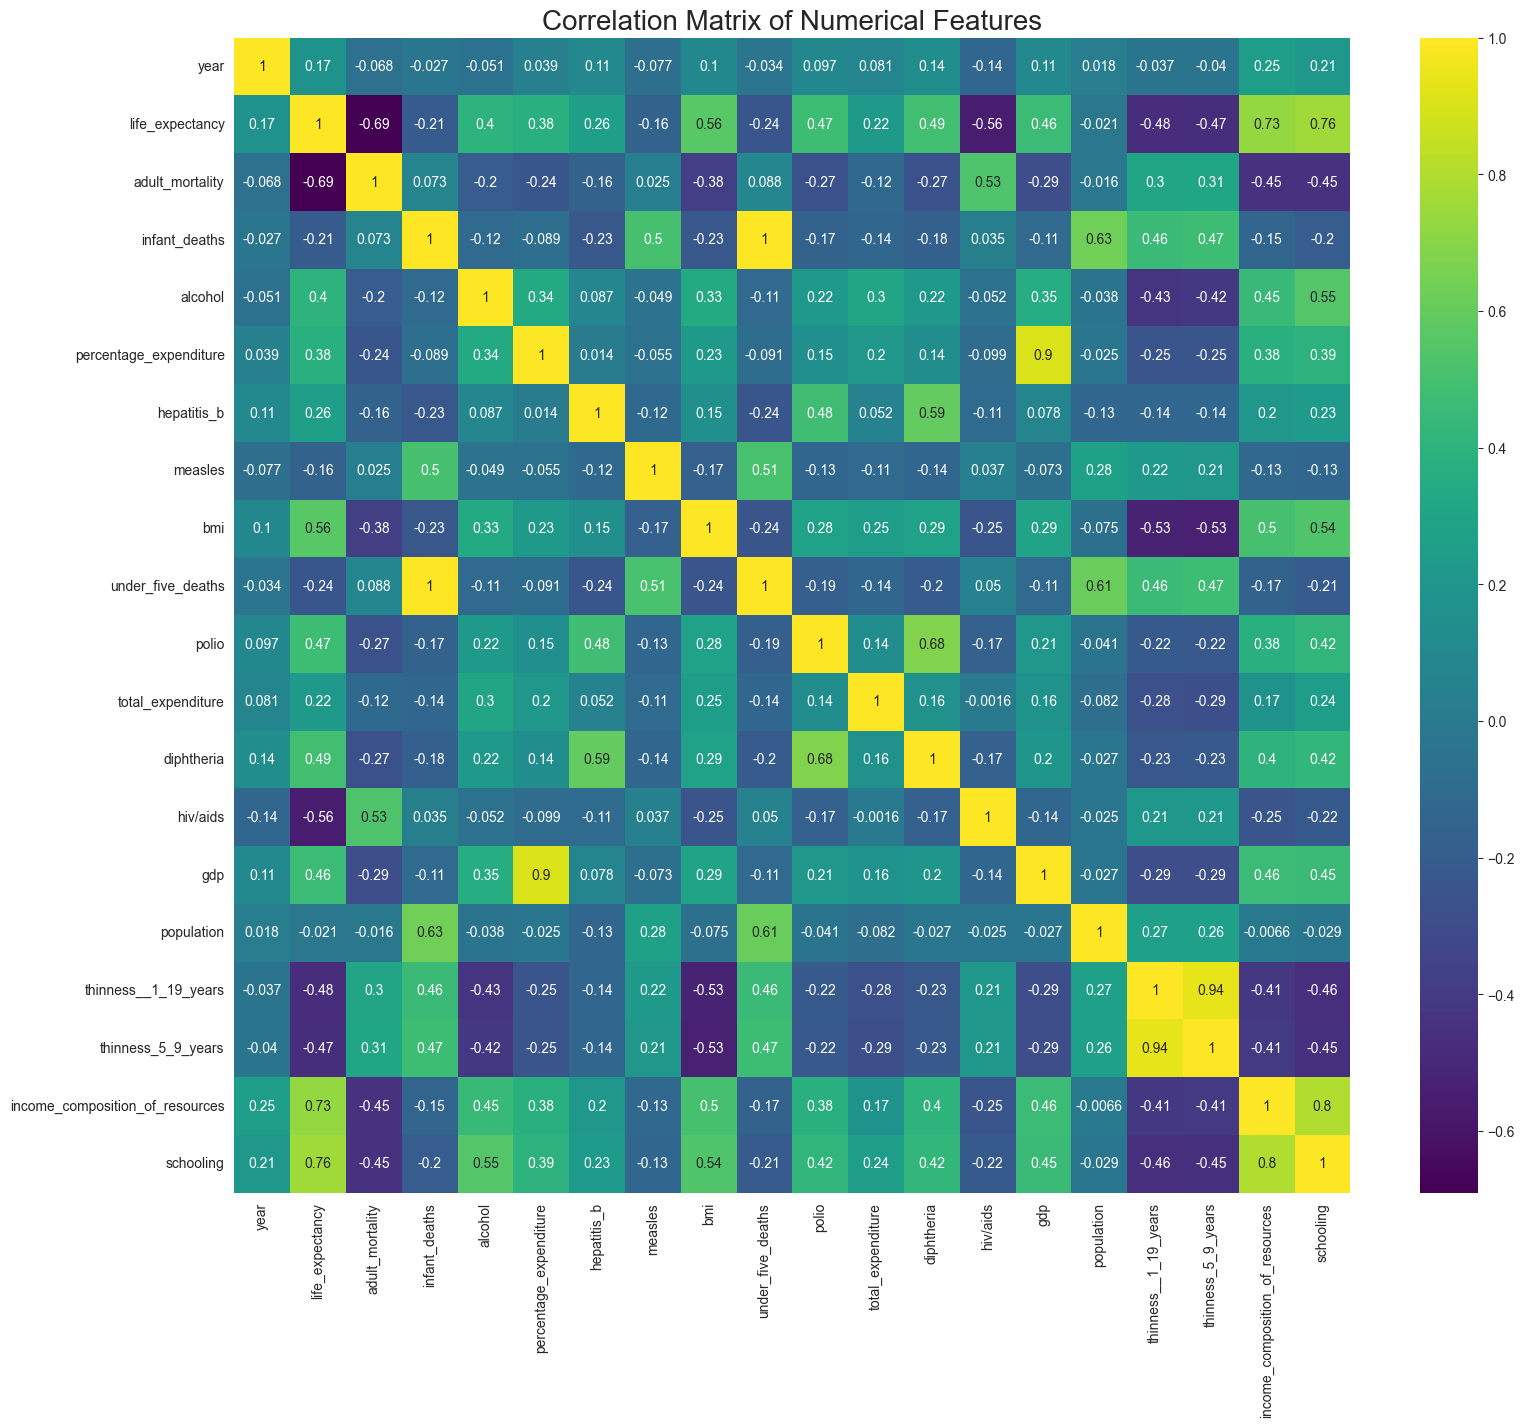


Correlations with Life Expectancy:
life_expectancy                    1.000000
schooling                          0.755890
income_composition_of_resources    0.726317
bmi                                0.563363
diphtheria                         0.485069
polio                              0.467687
gdp                                0.462088
alcohol                            0.402042
percentage_expenditure             0.381986
hepatitis_b                        0.255634
total_expenditure                  0.223340
year                               0.168648
population                        -0.021165
measles                           -0.161178
infant_deaths                     -0.207532
under_five_deaths                 -0.235205
thinness_5_9_years                -0.470651
thinness__1_19_years              -0.476842
hiv/aids                          -0.559350
adult_mortality                   -0.690212
Name: life_expectancy, dtype: float64


In [ ]:
# Calculate the correlation matrix for numerical features
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

# Display correlations with the target variable
print("\nCorrelations with Life Expectancy:")
print(corr_matrix['life_expectancy'].sort_values(ascending=False))

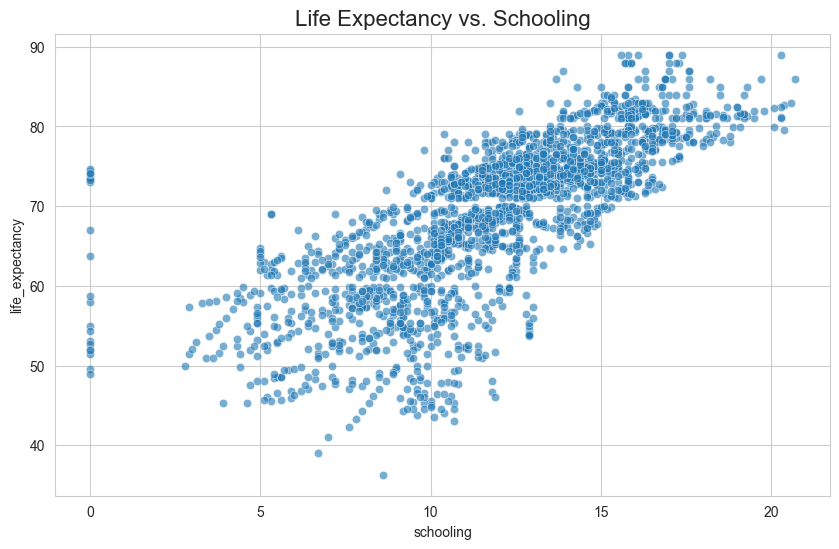

In [ ]:
# Scatter plot of life expectancy vs. schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='schooling', y='life_expectancy', data=df, alpha=0.6)
plt.title('Life Expectancy vs. Schooling', fontsize=16)
plt.show()

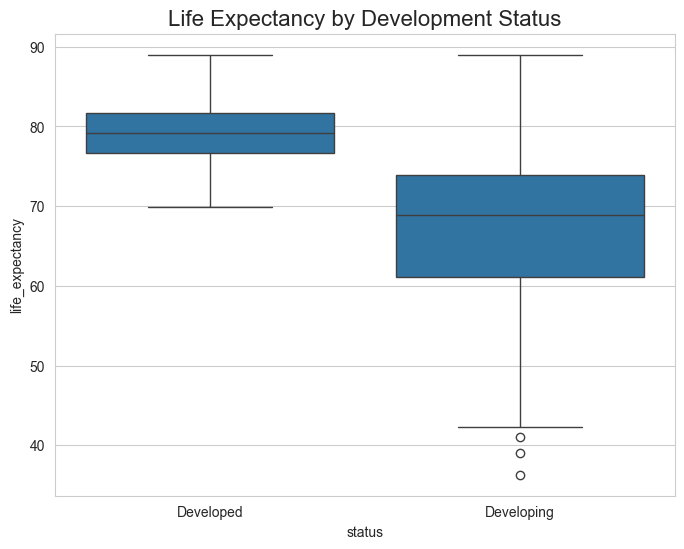

In [ ]:
# Box plot of life expectancy by development status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title('Life Expectancy by Development Status', fontsize=16)
plt.show()

# Model Behavior

Preprocessor fitted successfully.
Data transformed successfully.
Training model for convergence visualization...
Iteration 0: MSE = 4871.4000
Iteration 100: MSE = 265.4634
Iteration 200: MSE = 104.7349
Iteration 300: MSE = 91.4370
Iteration 400: MSE = 84.5865
Iteration 500: MSE = 78.7237
Iteration 600: MSE = 73.4320
Iteration 700: MSE = 68.6084
Iteration 800: MSE = 64.1993
Iteration 900: MSE = 60.1654
Iteration 1000: MSE = 56.4737
Iteration 1100: MSE = 53.0948
Iteration 1200: MSE = 50.0020
Iteration 1300: MSE = 47.1709
Iteration 1400: MSE = 44.5794
Iteration 1500: MSE = 42.2072
Iteration 1600: MSE = 40.0357
Iteration 1700: MSE = 38.0478
Iteration 1800: MSE = 36.2279
Iteration 1900: MSE = 34.5620
Iteration 2000: MSE = 33.0368
Iteration 2100: MSE = 31.6405
Iteration 2200: MSE = 30.3622
Iteration 2300: MSE = 29.1918
Iteration 2400: MSE = 28.1203
Iteration 2500: MSE = 27.1391
Iteration 2600: MSE = 26.2408
Iteration 2700: MSE = 25.4182
Iteration 2800: MSE = 24.6650
Iteration 2900: MSE = 23.

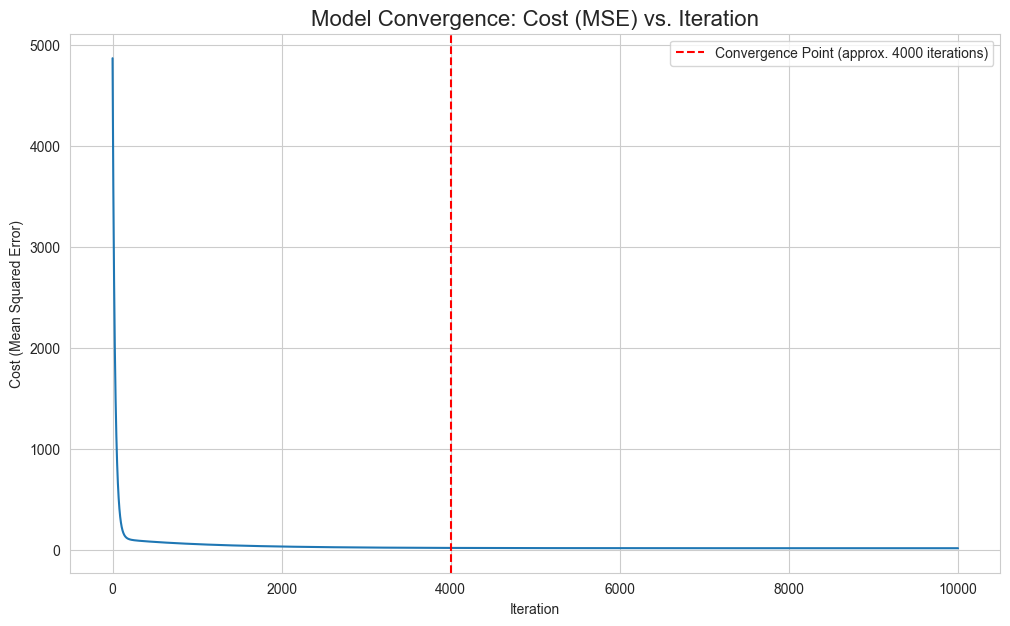

In [ ]:
import sys
import os
sys.path.append(os.path.join('..', 'src'))

from train_model import LinearRegression
from data_preprocessing import Preprocessor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

DATA_PATH = os.path.join('..', 'data', 'train_data.csv')
raw_df = pd.read_csv(DATA_PATH)

preprocessor = Preprocessor()
processed_df = preprocessor.fit_transform(raw_df)

X = processed_df.drop(columns=['life_expectancy'])
y = processed_df['life_expectancy']

print("Training model for convergence visualization...")
model2 = LinearRegression(learning_rate=0.01, n_iterations=10000)
model2.fit(X, y)
print("Training complete.")

# Plot the Convergence Curve

plt.figure(figsize=(12, 7))
plt.plot(range(model2.n_iterations), model2.cost_history)
plt.title('Model Convergence: Cost (MSE) vs. Iteration', fontsize=16)
plt.xlabel('Iteration')
plt.ylabel('Cost (Mean Squared Error)')
plt.axvline(x=4000, color='r', linestyle='--', label='Convergence Point (approx. 4000 iterations)')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning: Comparing Learning Rates


Starting learning rate comparison...
  Training with learning_rate = 0.1...
Iteration 0: MSE = 4871.4000
Iteration 100: MSE = 56.4033
Iteration 200: MSE = 32.9788
Iteration 300: MSE = 23.3078
Iteration 400: MSE = 19.3015
Iteration 500: MSE = 17.6297
Iteration 600: MSE = 16.9207
Iteration 700: MSE = 16.6095
Iteration 800: MSE = 16.4635
Iteration 900: MSE = 16.3865
Iteration 1000: MSE = 16.3391
Iteration 1100: MSE = 16.3048
Iteration 1200: MSE = 16.2769
Iteration 1300: MSE = 16.2524
Iteration 1400: MSE = 16.2302
Iteration 1500: MSE = 16.2096
Iteration 1600: MSE = 16.1905
Iteration 1700: MSE = 16.1726
Iteration 1800: MSE = 16.1558
Iteration 1900: MSE = 16.1401
Iteration 2000: MSE = 16.1254
Iteration 2100: MSE = 16.1116
Iteration 2200: MSE = 16.0987
Iteration 2300: MSE = 16.0866
Iteration 2400: MSE = 16.0752
Iteration 2500: MSE = 16.0645
Iteration 2600: MSE = 16.0545
Iteration 2700: MSE = 16.0452
Iteration 2800: MSE = 16.0364
Iteration 2900: MSE = 16.0282
Iteration 3000: MSE = 16.0205
Ite

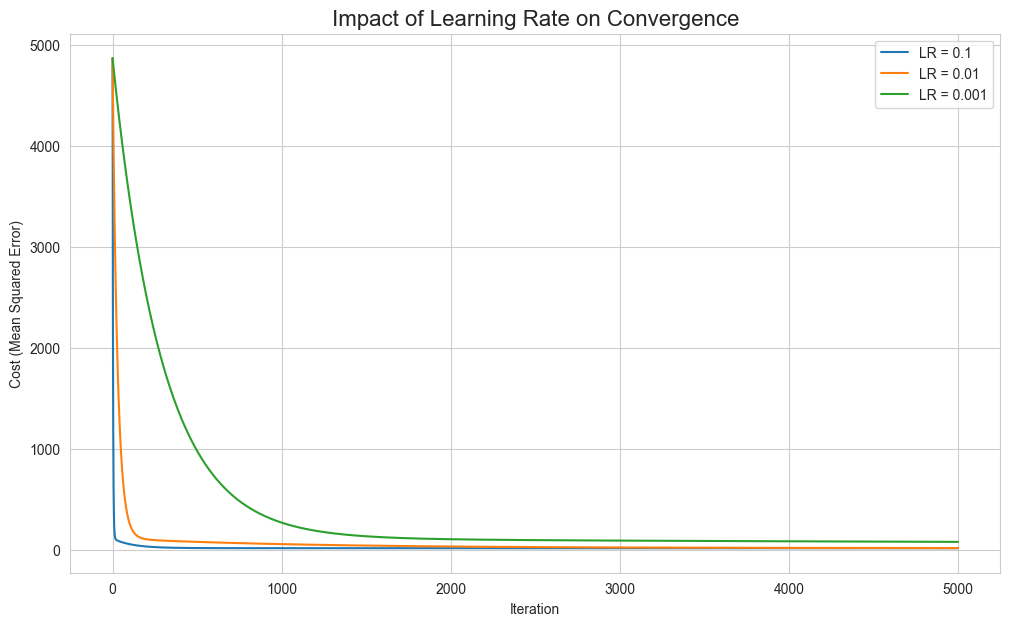

In [ ]:
learning_rates_to_test = [0.1, 0.01, 0.001]
# number of iterations to test
n_iter_comparison = 5000 

histories = {}

print("\nStarting learning rate comparison...")
for lr in learning_rates_to_test:
    print(f"  Training with learning_rate = {lr}...")
    model = LinearRegression(learning_rate=lr, n_iterations=n_iter_comparison)
    model.fit(X, y) 
    histories[lr] = model.cost_history
print("Comparison complete.")

# Plotting the Learning Rate Comparison

plt.figure(figsize=(12, 7))

for lr, history in histories.items():
    plt.plot(range(n_iter_comparison), history, label=f'LR = {lr}')

plt.title('Impact of Learning Rate on Convergence', fontsize=16)
plt.xlabel('Iteration')
plt.ylabel('Cost (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()